In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(precision=3, linewidth=500, threshold=500, suppress=True, edgeitems=5)

%matplotlib ipympl

%load_ext autoreload
%autoreload 2

import sys

sys.path.append('.')
sys.path.append('..')

import subprocess

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
def one_hop(beta, lam):
    return (1 + beta * lam) ** -1

def diffusion(beta, lam):
    return np.exp(-beta * lam)

def relu(beta, lam):    
    return np.maximum(1 - beta * lam, 0)

def sigmoid(beta, lam):
    return 2 * (1 + np.exp(beta * lam)) ** -1

def bandlimited(beta, lam):
    out = np.zeros_like(lam)
    out[beta > lam] = 1
    return out

def poly(beta, lam):
    return (lam - lam.max()) * (1 - lam**2) 


def f1(beta, lam):
    return lam.max() ** -1 * (lam.max() - lam)

def f2(beta, lam):
    return lam.max() ** -2 * (lam.max() - lam) ** 2 

def f3(beta, lam):
    return lam.max() ** -3 * (lam.max() - lam) ** 3

def f4(beta, lam):
    return lam.max() ** -4 * (lam.max() - lam) ** 4

funcs = [one_hop, diffusion, relu, sigmoid, bandlimited, f3]


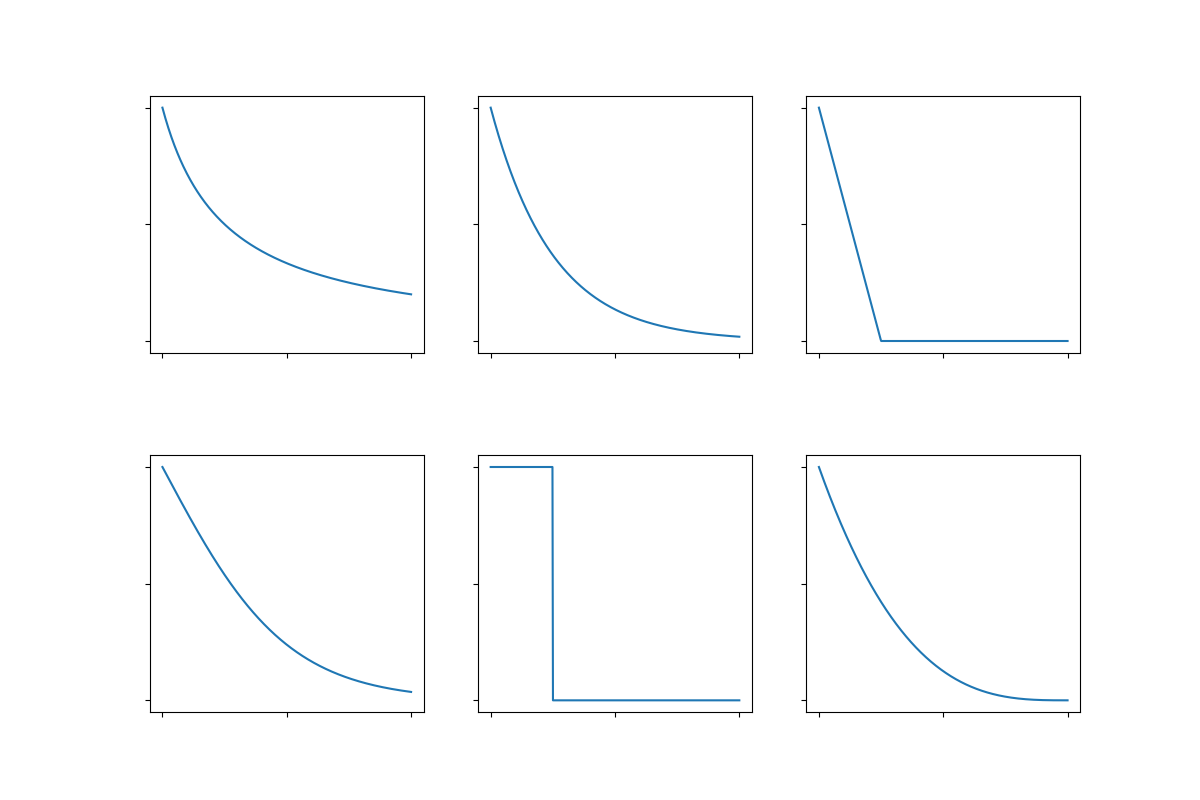

In [4]:
def plot_filters(save=False):

    fig, axes = plt.subplots(ncols=3, nrows=2, sharex=True, sharey=True, figsize=(12, 8))

    lam = np.linspace(0, 4, 500)

    for i, (ax, func) in enumerate(zip(axes.ravel(), funcs)):
        
        ax.plot(lam, func(1, lam))
        
        ax.set_xticklabels([])
        ax.set_yticks([0, 0.5, 1])
        ax.set_xticks([0, 0.5 * lam.max(), lam.max()])
        ax.set_yticklabels([])
        
    plt.subplots_adjust(hspace=0.4)

    if save:

        plt.savefig('filters/filters.pdf')

        subprocess.run(['pdfcrop', 'filters/filters.pdf', 'filters/filters.pdf'])

plot_filters(save=False)